<a href="https://colab.research.google.com/github/FahadQasim283/AI/blob/main/informed_and_uninformed_searching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Route Optimization Problem Formulation:

1. State Space:
Home, Office, Supermarket, Hospital, School, Park, Shopping Mall, Restaurant

2. Initial State: Home
3. Goal State: Restaurant

4. Possible Actions:
Home: ['Office', 'Supermarket']
Office: ['Home', 'Hospital']
Supermarket: ['Home', 'School']
Hospital: ['Office', 'Park']
School: ['Supermarket', 'Shopping Mall']
Park: ['Hospital', 'Restaurant']
Shopping Mall: ['School', 'Restaurant']
Restaurant: ['Park', 'Shopping Mall']

5. Cost Function:
Cost from Home to Office: 5
Cost from Home to Supermarket: 3
Cost from Office to Hospital: 4
Cost from Supermarket to School: 2
Cost from Hospital to Park: 6
Cost from School to Shopping Mall: 3
Cost from Park to Restaurant: 4
Cost from Shopping Mall to Restaurant: 5


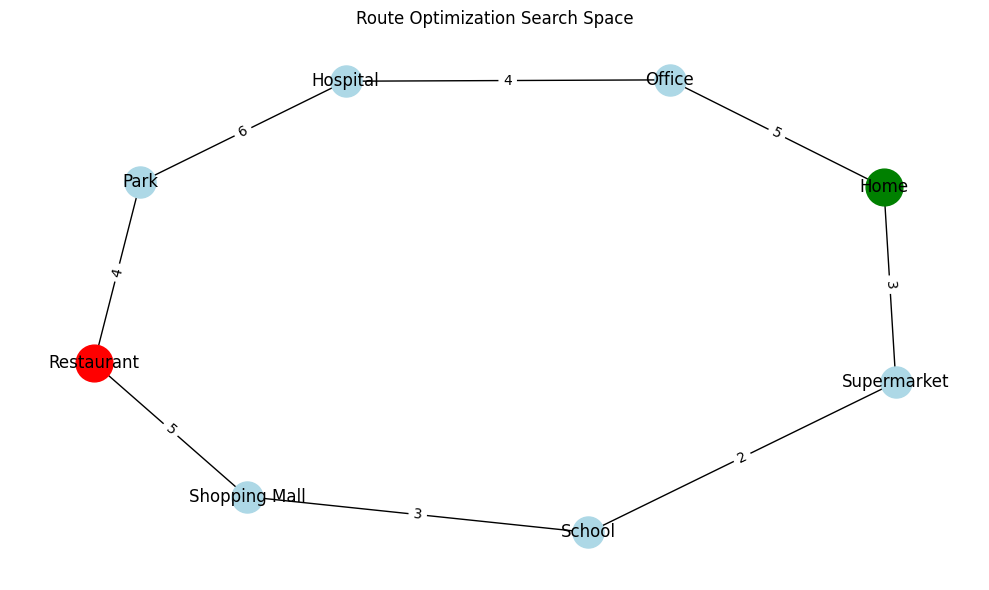

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class RouteOptimizationProblem:
    def __init__(self):
        # Create a graph representing city transportation network
        self.graph = nx.Graph()

        # Define nodes (locations in the city)
        locations = [
            "Home", "Office", "Supermarket",
            "Hospital", "School", "Park",
            "Shopping Mall", "Restaurant"
        ]

        # Add nodes to the graph
        self.graph.add_nodes_from(locations)

        # Add edges with distances (representing travel time/distance)
        edges = [
            ("Home", "Office", 5),
            ("Home", "Supermarket", 3),
            ("Office", "Hospital", 4),
            ("Supermarket", "School", 2),
            ("Hospital", "Park", 6),
            ("School", "Shopping Mall", 3),
            ("Park", "Restaurant", 4),
            ("Shopping Mall", "Restaurant", 5)
        ]

        # Add weighted edges
        self.graph.add_weighted_edges_from(edges)

        # Define initial and goal states
        self.initial_state = "Home"
        self.goal_state = "Restaurant"

    def get_state_space(self):
        """
        Represent the state space of the route optimization problem
        """
        return list(self.graph.nodes())

    def get_actions(self, current_state):
        """
        Return possible actions (adjacent locations) from current state
        """
        return list(self.graph.neighbors(current_state))

    def get_cost(self, from_state, to_state):
        """
        Calculate the cost (distance/time) between two states
        """
        return self.graph[from_state][to_state]['weight']

    def visualize_search_space(self):
        """
        Create a visual representation of the search space
        """
        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(self.graph, seed=42)

        # Draw nodes
        nx.draw_networkx_nodes(self.graph, pos, node_color='lightblue', node_size=500)

        # Highlight initial and goal states
        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=[self.initial_state],
                                node_color='green',
                                node_size=700)
        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=[self.goal_state],
                                node_color='red',
                                node_size=700)

        # Draw edges with weights
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw_networkx_edges(self.graph, pos)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)

        # Draw node labels
        nx.draw_networkx_labels(self.graph, pos)

        plt.title("Route Optimization Search Space")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    def print_problem_details(self):
        """
        Print detailed problem formulation
        """
        print("Route Optimization Problem Formulation:")
        print("\n1. State Space:")
        print(", ".join(self.get_state_space()))

        print(f"\n2. Initial State: {self.initial_state}")
        print(f"3. Goal State: {self.goal_state}")

        print("\n4. Possible Actions:")
        for node in self.graph.nodes():
            print(f"{node}: {self.get_actions(node)}")

        print("\n5. Cost Function:")
        for (u, v, w) in self.graph.edges(data='weight'):
            print(f"Cost from {u} to {v}: {w}")

# Create and demonstrate the problem
route_problem = RouteOptimizationProblem()
route_problem.print_problem_details()
route_problem.visualize_search_space()

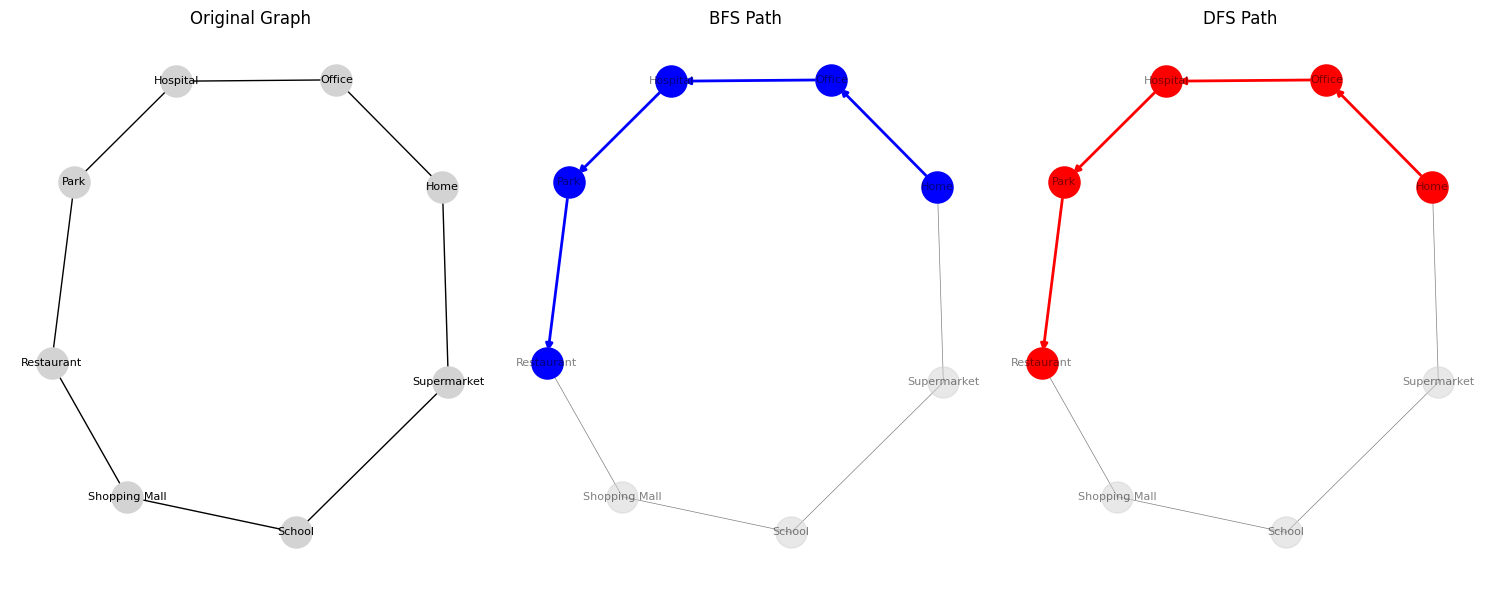

BFS Path: Home -> Office -> Hospital -> Park -> Restaurant
DFS Path: Home -> Office -> Hospital -> Park -> Restaurant


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class RouteSearchVisualization:
    def __init__(self, graph, start, goal):
        """
        Initialize the search problem
        """
        self.graph = graph
        self.start = start
        self.goal = goal

    def breadth_first_search(self):
        """
        Perform Breadth-First Search

        Returns:
        list: Path from start to goal
        """
        visited = set()
        queue = [[self.start]]

        while queue:
            path = queue.pop(0)
            node = path[-1]

            if node == self.goal:
                return path

            if node not in visited:
                visited.add(node)
                for neighbor in self.graph.neighbors(node):
                    if neighbor not in path:
                        new_path = list(path)
                        new_path.append(neighbor)
                        queue.append(new_path)

        return None

    def depth_first_search(self):
        """
        Perform Depth-First Search

        Returns:
        list: Path from start to goal
        """
        visited = set()
        stack = [[self.start]]

        while stack:
            path = stack.pop()
            node = path[-1]

            if node == self.goal:
                return path

            if node not in visited:
                visited.add(node)
                neighbors = list(self.graph.neighbors(node))
                for neighbor in reversed(neighbors):
                    if neighbor not in path:
                        new_path = list(path)
                        new_path.append(neighbor)
                        stack.append(new_path)

        return None

    def visualize_search_paths(self):
        """
        Visualize search paths for BFS and DFS
        """
        # Perform searches
        bfs_path = self.breadth_first_search()
        dfs_path = self.depth_first_search()

        # Create the plot
        plt.figure(figsize=(15, 6))

        # Main graph layout
        pos = nx.spring_layout(self.graph, seed=42)

        # Draw the base graph
        plt.subplot(131)
        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightgray',
                node_size=500,
                font_size=8)
        plt.title("Original Graph")

        # BFS Path Graph
        plt.subplot(132)
        bfs_graph = nx.DiGraph()
        if bfs_path:
            bfs_graph.add_edges_from(zip(bfs_path[:-1], bfs_path[1:]))

        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightgray',
                node_size=500,
                font_size=8,
                width=0.5,
                alpha=0.5)

        nx.draw_networkx_edges(bfs_graph, pos,
                                edge_color='blue',
                                width=2,
                                arrows=True)

        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=bfs_path,
                                node_color='blue',
                                node_size=500)
        plt.title("BFS Path")

        # DFS Path Graph
        plt.subplot(133)
        dfs_graph = nx.DiGraph()
        if dfs_path:
            dfs_graph.add_edges_from(zip(dfs_path[:-1], dfs_path[1:]))

        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightgray',
                node_size=500,
                font_size=8,
                width=0.5,
                alpha=0.5)

        nx.draw_networkx_edges(dfs_graph, pos,
                                edge_color='red',
                                width=2,
                                arrows=True)

        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=dfs_path,
                                node_color='red',
                                node_size=500)
        plt.title("DFS Path")

        plt.tight_layout()
        plt.show()

        # Print paths
        print("BFS Path:", ' -> '.join(bfs_path) if bfs_path else "No path found")
        print("DFS Path:", ' -> '.join(dfs_path) if dfs_path else "No path found")

# Create graph
graph = nx.Graph()
locations = ["Home", "Office", "Supermarket", "Hospital", "School", "Park", "Shopping Mall", "Restaurant"]
graph.add_nodes_from(locations)

edges = [
    ("Home", "Office", 5),
    ("Home", "Supermarket", 3),
    ("Office", "Hospital", 4),
    ("Supermarket", "School", 2),
    ("Hospital", "Park", 6),
    ("School", "Shopping Mall", 3),
    ("Park", "Restaurant", 4),
    ("Shopping Mall", "Restaurant", 5)
]
graph.add_weighted_edges_from(edges)

# Run search visualization
search_viz = RouteSearchVisualization(graph, "Home", "Restaurant")
search_viz.visualize_search_paths()

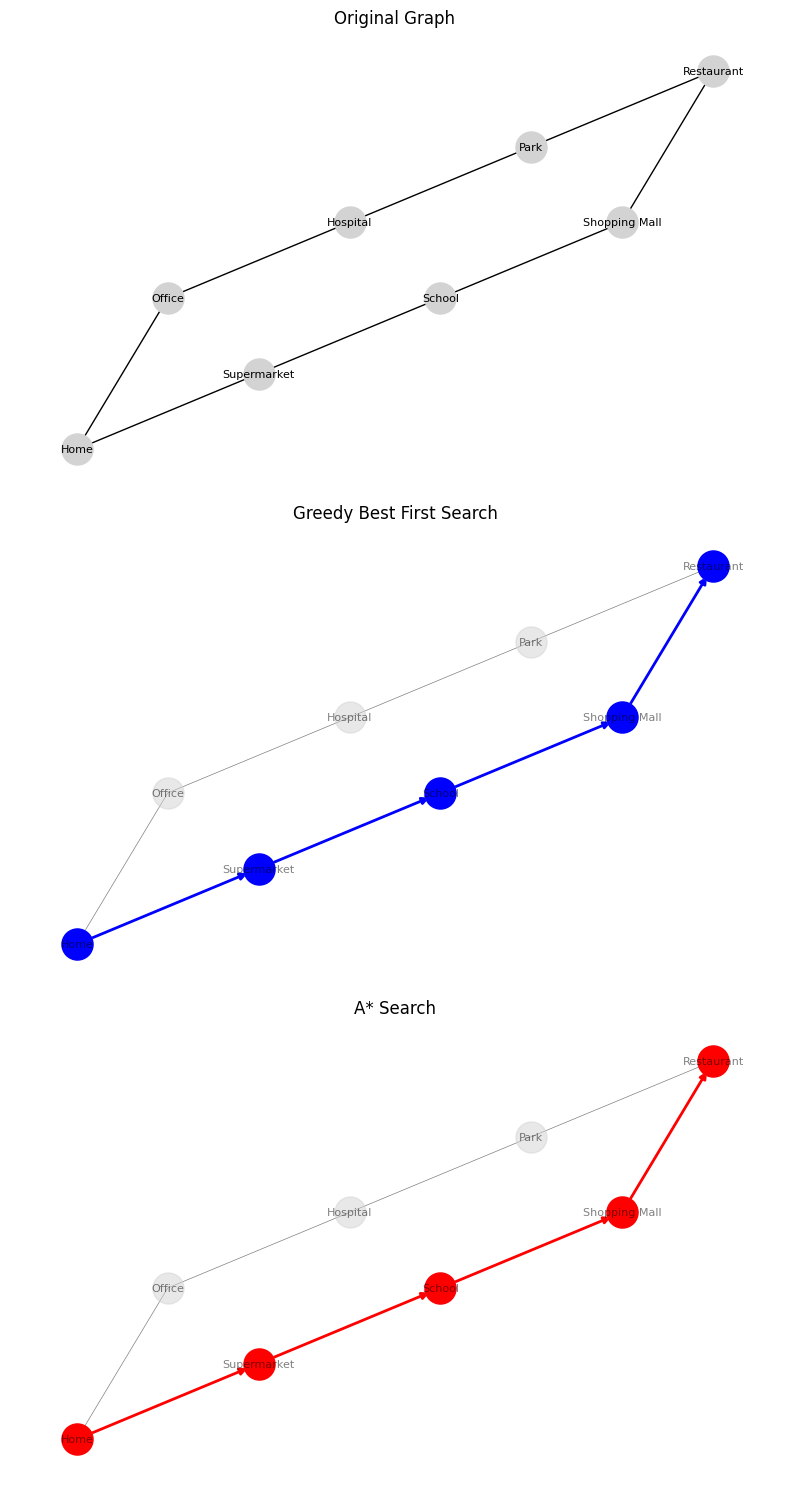


Search Algorithm Paths:
Greedy Best First Search Path: Home -> Supermarket -> School -> Shopping Mall -> Restaurant
A* Search Path: Home -> Supermarket -> School -> Shopping Mall -> Restaurant

Path Costs:
Greedy Best First Search Cost: 13
A* Search Cost: 13


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import math

class InformedSearchAlgorithms:
    def __init__(self, graph, start, goal):
        """
        Initialize the search problem with graph and heuristics
        """
        self.graph = graph
        self.start = start
        self.goal = goal

        # Predefined coordinates for heuristic calculation
        self.node_coordinates = {
            "Home": (0, 0),
            "Office": (1, 2),
            "Supermarket": (2, 1),
            "Hospital": (3, 3),
            "School": (4, 2),
            "Park": (5, 4),
            "Shopping Mall": (6, 3),
            "Restaurant": (7, 5)
        }

    def euclidean_distance_heuristic(self, node):
        """
        Heuristic function using Euclidean distance to goal
        """
        goal_coords = self.node_coordinates[self.goal]
        node_coords = self.node_coordinates[node]

        return math.sqrt(
            (goal_coords[0] - node_coords[0])**2 +
            (goal_coords[1] - node_coords[1])**2
        )

    def get_edge_cost(self, from_node, to_node):
        """
        Get the cost between two nodes
        """
        return self.graph[from_node][to_node]['weight']

    def greedy_best_first_search(self):
        """
        Greedy Best First Search Algorithm
        """
        # Priority queue to store paths
        frontier = [(self.euclidean_distance_heuristic(self.start), [self.start])]
        explored = set()

        while frontier:
            _, path = heapq.heappop(frontier)
            node = path[-1]

            # Goal test
            if node == self.goal:
                return path

            # Avoid revisiting nodes
            if node in explored:
                continue
            explored.add(node)

            # Explore neighbors
            for neighbor in self.graph.neighbors(node):
                if neighbor not in explored and neighbor not in path:
                    new_path = path + [neighbor]
                    priority = self.euclidean_distance_heuristic(neighbor)
                    heapq.heappush(frontier, (priority, new_path))

        return None

    def a_star_search(self):
        """
        A* Search Algorithm
        """
        # Priority queue to store paths
        frontier = [(0, [self.start])]
        explored = set()

        while frontier:
            current_cost, path = heapq.heappop(frontier)
            node = path[-1]

            # Goal test
            if node == self.goal:
                return path

            # Avoid revisiting nodes
            if node in explored:
                continue
            explored.add(node)

            # Explore neighbors
            for neighbor in self.graph.neighbors(node):
                if neighbor not in explored and neighbor not in path:
                    new_path = path + [neighbor]

                    # Calculate path cost (g)
                    path_cost = sum(
                        self.get_edge_cost(new_path[i], new_path[i+1])
                        for i in range(len(new_path) - 1)
                    )

                    # Heuristic estimate (h)
                    heuristic_cost = self.euclidean_distance_heuristic(neighbor)

                    # Total estimated cost (f = g + h)
                    total_cost = path_cost + heuristic_cost

                    heapq.heappush(frontier, (total_cost, new_path))

        return None

    def visualize_search_paths(self):
        """
        Visualize Greedy Best First and A* Search paths
        """
        # Perform searches
        greedy_path = self.greedy_best_first_search()
        astar_path = self.a_star_search()

        # Create the plot with vertical layout
        plt.figure(figsize=(8, 15))

        # Main graph layout using predefined coordinates
        pos = {node: coords for node, coords in self.node_coordinates.items()}

        # Original Graph
        plt.subplot(311)
        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightgray',
                node_size=500,
                font_size=8)
        plt.title("Original Graph")

        # Greedy Best First Search Path
        plt.subplot(312)
        greedy_graph = nx.DiGraph()
        if greedy_path:
            greedy_graph.add_edges_from(zip(greedy_path[:-1], greedy_path[1:]))

        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightgray',
                node_size=500,
                font_size=8,
                width=0.5,
                alpha=0.5)

        nx.draw_networkx_edges(greedy_graph, pos,
                                edge_color='blue',
                                width=2,
                                arrows=True)

        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=greedy_path,
                                node_color='blue',
                                node_size=500)
        plt.title("Greedy Best First Search")

        # A* Search Path
        plt.subplot(313)
        astar_graph = nx.DiGraph()
        if astar_path:
            astar_graph.add_edges_from(zip(astar_path[:-1], astar_path[1:]))

        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightgray',
                node_size=500,
                font_size=8,
                width=0.5,
                alpha=0.5)

        nx.draw_networkx_edges(astar_graph, pos,
                                edge_color='red',
                                width=2,
                                arrows=True)

        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=astar_path,
                                node_color='red',
                                node_size=500)
        plt.title("A* Search")

        plt.tight_layout()
        plt.show()

        # Compare paths
        print("\nSearch Algorithm Paths:")
        print("Greedy Best First Search Path:", ' -> '.join(greedy_path) if greedy_path else "No path found")
        print("A* Search Path:", ' -> '.join(astar_path) if astar_path else "No path found")

        # Calculate path costs
        def calculate_path_cost(path):
            if not path:
                return float('inf')
            return sum(self.get_edge_cost(path[i], path[i+1]) for i in range(len(path)-1))

        print("\nPath Costs:")
        print("Greedy Best First Search Cost:", calculate_path_cost(greedy_path))
        print("A* Search Cost:", calculate_path_cost(astar_path))

# Create graph
graph = nx.Graph()
locations = ["Home", "Office", "Supermarket", "Hospital", "School", "Park", "Shopping Mall", "Restaurant"]
graph.add_nodes_from(locations)

edges = [
    ("Home", "Office", 5),
    ("Home", "Supermarket", 3),
    ("Office", "Hospital", 4),
    ("Supermarket", "School", 2),
    ("Hospital", "Park", 6),
    ("School", "Shopping Mall", 3),
    ("Park", "Restaurant", 4),
    ("Shopping Mall", "Restaurant", 5)
]
graph.add_weighted_edges_from(edges)

# Run informed search algorithms
search = InformedSearchAlgorithms(graph, "Home", "Restaurant")
search.visualize_search_paths()